<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 09</o>: <m>(__Num 4 ML__)</m>

> <c>Constrained optimization</c> 
##### <m> Problem </m>

![Alt text](image.png)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
from scipy import optimize as OPT
%matplotlib inline

In [2]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der


def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

def Consts(x,cons=None):
    match cons:
        case "1":
            return  sum(1-x[:-1] + 2 *x[1:])
        case "2":
            return 1 - sum(x[:-1]**2.0 + x[1:])
        case "3":
            return 1 - sum(x[:-1]**2.0 - x[1:])
        case "4":
            return 1 - sum(2*x[:-1] + x[1:])
        case "5":
            cond = np.nonzero((x[:-1]<=1) & (x[:-1]>=0))[1]
            y = np.zeros_like(x)
            y[:-1,cond] = x[:-1,cond]
            return y[:-1]
        case "6":
            cond = np.nonzero((x[1:]<=2.0) & (x[1:]>=-0.5))[1]
            y = np.zeros_like(x)
            y[1:,cond] = x[1:,cond]
            return y[1:]


<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <m> The Feasable space of Constrainted Rosenbrock function </m>

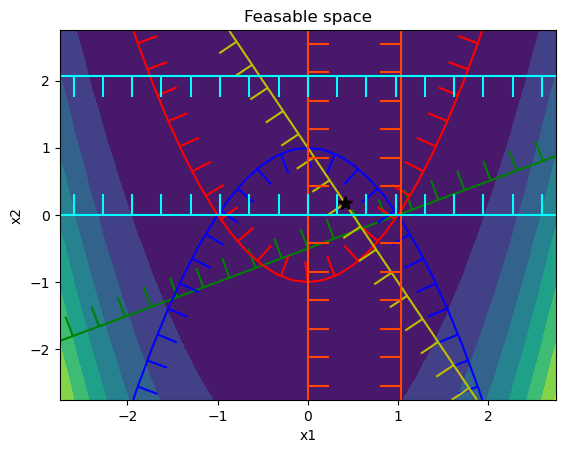

In [47]:
M = 33
X,Y = np.meshgrid(np.linspace(-2.75,2.75,num=M),np.linspace(-2.75,2.75,num=M))
Points = np.vstack((X.flatten(),Y.flatten()))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.contourf(X,Y,rosen(Points).reshape(X.shape),cmap='viridis')
C1 = ax.contour(X,Y,Consts(Points,cons="1").reshape(X.shape),[0],colors='g')
C1.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C2 = ax.contour(X,Y,Consts(Points,cons="2").reshape(X.shape),[0],colors='b')
C2.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C3 = ax.contour(X,Y,Consts(Points,cons="3").reshape(X.shape),[0],colors='r')
C3.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C4 = ax.contour(X,Y,Consts(Points,cons="4").reshape(X.shape),[0],colors="y")
C4.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C5 = ax.contour(X,Y,Consts(Points,cons="5").reshape(X.shape),[0],colors="orangered")
C5.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C6 = ax.contour(X,Y,Consts(Points,cons="6").reshape(X.shape),[0],colors="cyan")
C6.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
ax.plot(0.4149,0.1701,'k*',ms=10.0)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Feasable space")
plt.show()

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <m> Using Scipy.Minimize </m>

>> Generally think as 
$$\begin{align*}
\underset{x}{min} f(x)\\
\text{s.t:}\,\,\,\, c^l \leq c(x) \leq c^u,\\
x^l \leq x \leq x^u.
\end{align*}$$

In [51]:
# Conditions
bounds = OPT.Bounds(lb=[0,-0.5],ub=[1.0,2.0])
LinConst = OPT.LinearConstraint([[1,2],[2,1]],[-np.inf,1],[1,1])
def Const(x):
    return [x[0]**2 + x[1],x[0]**2 - x[1]]
def J_Const(x):
    return [[2*x[0],1],[2*x[0],-1]]
def H_Const(x,v):
    return v[0]*np.array([[2,0],[0,0]]) + v[1]*np.array([[2,0],[0,0]])

NLConst = OPT.NonlinearConstraint(Const,-np.inf,1,jac=J_Const,hess=H_Const) 

In [53]:
init = np.array([0.5,0])
result = OPT.minimize(rosen,init,method='trust-constr',jac=rosen_der,hess=rosen_hess,constraints=[LinConst,NLConst],options={'verbose':1},bounds=bounds)
print(result)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.025 s.
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.3427175756422305
                 x: [ 4.149e-01  1.701e-01]
               nit: 12
              nfev: 8
              njev: 8
              nhev: 8
          cg_niter: 7
      cg_stop_cond: 1
              grad: [-8.265e-01 -4.140e-01]
   lagrangian_grad: [ 1.495e-09 -2.990e-09]
            constr: [array([ 7.552e-01,  1.000e+00]), array([ 3.423e-01,  2.070e-03]), array([ 4.149e-01,  1.701e-01])]
               jac: [array([[ 1.000e+00,  2.000e+00],
                           [ 2.000e+00,  1.000e+00]]), array([[ 8.299e-01,  1.000e+00],
                           [ 8.299e-01, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00],
                           [ 0.000e+00,  1.00

In [55]:
result.items()

dict_items([('nit', 12), ('nfev', 8), ('njev', 8), ('nhev', 8), ('cg_niter', 7), ('cg_stop_cond', 1), ('fun', 0.3427175756422305), ('grad', array([-0.82649483, -0.41404799])), ('lagrangian_grad', array([ 1.49481102e-09, -2.98962199e-09])), ('constr', [array([0.75516406, 1.        ]), array([0.34228899, 0.00207024]), array([0.41494531, 0.17010937])]), ('jac', [array([[1., 2.],
       [2., 1.]]), array([[ 0.82989063,  1.        ],
       [ 0.82989063, -1.        ]]), array([[1., 0.],
       [0., 1.]])]), ('constr_nfev', [0, 8, 0]), ('constr_njev', [0, 8, 0]), ('constr_nhev', [0, 13, 0]), ('v', [array([0.00065357, 0.41280922]), array([0.00024327, 0.00016033]), array([-0.00011213, -0.00015132])]), ('method', 'tr_interior_point'), ('x', array([0.41494531, 0.17010937])), ('optimality', 2.989621990668722e-09), ('constr_violation', 0.0), ('execution_time', 0.02486896514892578), ('tr_radius', 3834.1597660672396), ('constr_penalty', 1.0), ('barrier_parameter', 0.00016000000000000007), ('barrier_